<a href="https://colab.research.google.com/github/Aryy234/study/blob/ML/7-semester/ML/Diagn%C3%B3stico_de_valores_faltantes_(MCAR%2C_MAR%2C_MNAR)_dataset_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Realiza la conexion con google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Lee los datos de esta ruta: /content/drive/MyDrive/Colab Notebooks/Aprendizaje automatico/titanic.csv y los traigas al colab

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2025/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#muestra cuántos valores
#no nulos hay en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Verificar la cantidad
# de valores faltantes por columna
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Obtener el Porcentaje de Valores Faltantes
missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
#Filtrar Filas con Valores Faltantes
rows_with_missing = pd.DataFrame (df [df.isnull().any(axis=1)])
rows_with_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


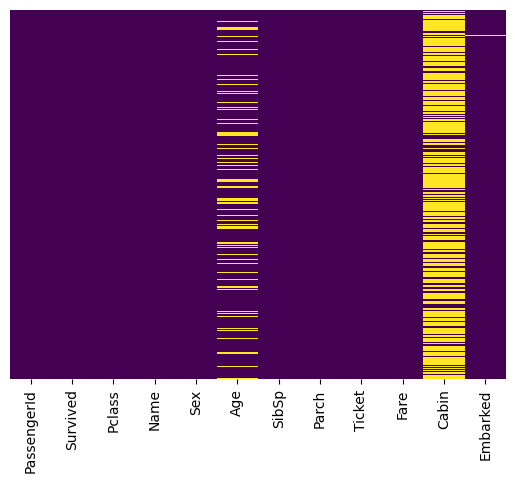

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

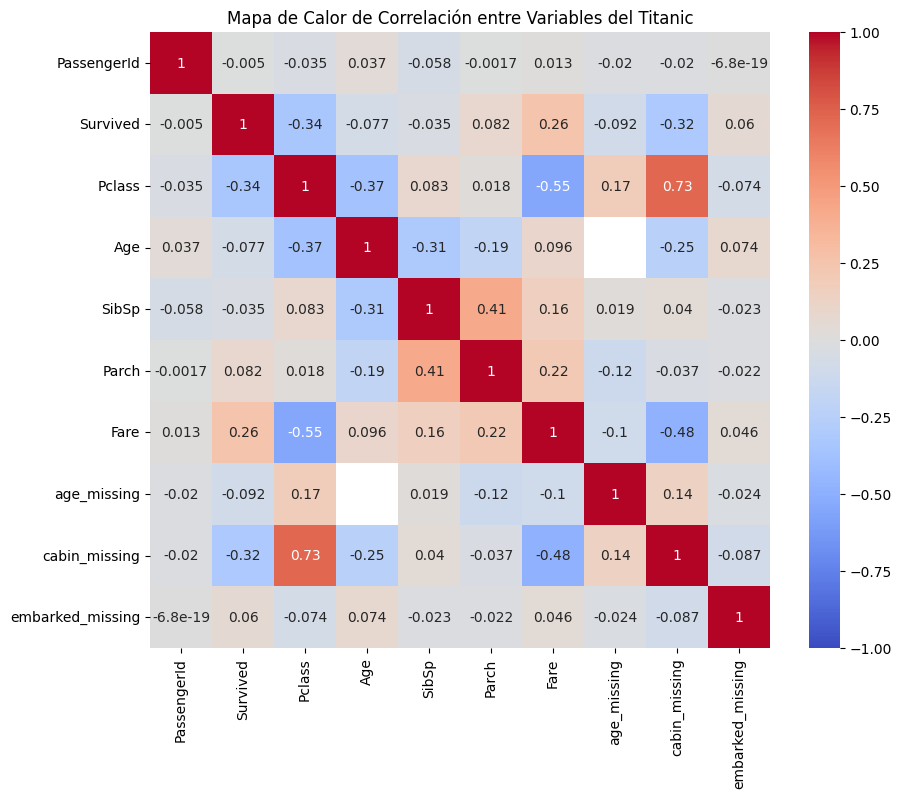

In [ ]:
import seaborn as sns
# Crear una copia del dataset e introducir columnas
# que indican si el valor está faltante o no
titanic_missing = df.select_dtypes (include=['float64', 'int64'])
titanic_missing['age_missing'] = df['Age'].isnull().astype(int)
titanic_missing['cabin_missing'] = df['Cabin'].isnull().astype(int)
titanic_missing['embarked_missing'] = df ['Embarked'].isnull().astype(int)
# Calcular la matriz de correlación
correlation_matrix = titanic_missing.corr()
# Graficar el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlación entre Variables del Titanic")
plt.show()

# Diagnóstico de Valores Faltantes en el Dataset Titanic

A continuación se presenta un análisis de los tipos de valores faltantes (MCAR, MAR, MNAR) para las columnas `Age`, `Cabin` y `Embarked` del dataset Titanic, basado en los resultados proporcionados y el mapa de calor de correlación.

## Resumen General de Valores Faltantes

Del análisis inicial se desprende que las siguientes columnas tienen valores faltantes:

* `Age` (Edad): 177 valores faltantes (19.87%)
* `Cabin` (Cabina): 687 valores faltantes (77.10%)
* `Embarked` (Puerto de Embarque): 2 valores faltantes (0.22%)

## Definiciones de Tipos de Valores Faltantes

* **MCAR (Missing Completely At Random):** La probabilidad de que un valor falte es independiente tanto de las variables observadas como de los propios valores faltantes. Es aleatorio por completo.
* **MAR (Missing At Random):** La probabilidad de que un valor falte depende *únicamente* de la información contenida en *otras variables observadas* en el dataset.
* **MNAR (Missing Not At Random):** La probabilidad de que un valor falte depende del *propio valor que falta* o de variables no observadas.

## Análisis Detallado por Columna

### 1. Embarked (Puerto de Embarque)

* **Cantidad Faltante:** Muy baja (2 valores, 0.22%).
* **Análisis (Mapa de Calor):**
    * La fila/columna `embarked_missing` en el mapa de calor muestra correlaciones extremadamente bajas (cercanas a 0) con todas las demás variables (`Survived`: 0.06, `Pclass`: -0.074, `Fare`: 0.046, etc.).
    * Esto sugiere que la ausencia de estos dos valores no sigue un patrón relacionado con otras características observables de los pasajeros.
* **Clasificación:** La falta de correlación y la pequeña cantidad apuntan fuertemente a **MCAR**. Es probable que se trate de errores de entrada de datos puntuales y aleatorios.
* **Estrategia Recomendada:**
    * **Eliminación:** Dada la mínima cantidad, eliminar las 2 filas con datos faltantes en `Embarked` (listwise deletion) es la opción más práctica y con menor impacto.
    * *Alternativa:* Imputación con la moda (el puerto más frecuente), aunque la eliminación es más sencilla aquí.

### 2. Age (Edad)

* **Cantidad Faltante:** Significativa (177 valores, ~20%).
* **Análisis (Mapa de Calor):**
    * La fila/columna `age_missing` muestra algunas correlaciones débiles pero presentes:
        * `Pclass`: 0.17 (Positiva débil) -> Falta un poco más en clases bajas.
        * `Survived`: -0.092 (Negativa muy débil) -> Falta ligeramente menos en supervivientes.
        * `Parch`: -0.12 (Negativa débil) -> Falta ligeramente menos si viajan con padres/hijos.
        * `Cabin_missing`: 0.1 (Positiva débil) -> Si falta cabina, es un poco más probable que falte edad.
    * Estas correlaciones indican que la probabilidad de que falte la edad *sí* está relacionada con otras variables *observadas*.
* **Clasificación:** La dependencia de otras variables observadas (`Pclass`, `Parch`) encaja con la definición de **MAR**. No es completamente aleatorio (no MCAR). Aunque podría haber un componente MNAR no detectable aquí, MAR es la suposición más justificada con la evidencia disponible.
* **Estrategia Recomendada:**
    * **Imputación:** Eliminar el 20% de los datos sería perjudicial. Se debe imputar. Opciones:
        * Imputación simple: Usar la *mediana* de la edad (más robusta a outliers que la media).
        * Imputación por regresión: Crear un modelo simple para predecir `Age` usando `Pclass`, `SibSp`, `Parch`, etc.
        * Imputación por grupos: Calcular la mediana de `Age` para diferentes segmentos (ej. por `Pclass` y `Sex`) y usarla para imputar.

### 3. Cabin (Cabina)

* **Cantidad Faltante:** Muy alta (687 valores, ~77%).
* **Análisis (Mapa de Calor):**
    * La fila/columna `cabin_missing` revela correlaciones notables:
        * `Pclass`: 0.73 (¡Positiva Fuerte!) -> La cabina falta masivamente en clases bajas (2da y 3ra).
        * `Survived`: -0.32 (Negativa Moderada) -> Menor supervivencia si falta la cabina.
        * `Fare`: -0.48 (Negativa Moderada) -> Tarifas más bajas si falta la cabina.
    * La fuerte asociación con `Pclass` y `Fare` sugiere que la falta de cabina no es aleatoria, sino que está ligada al estatus socioeconómico. Es muy probable que muchos pasajeros de clases inferiores *no tuvieran asignada* una cabina específica (o no se registrara).
* **Clasificación:** La razón de la ausencia del dato (`Cabin`) está directamente relacionada con la naturaleza del pasajero (su clase, que determina si *tenía* o no una cabina registrable). Esto se ajusta mejor a **MNAR**. La ausencia depende de factores (como la clase) que determinan la existencia misma del valor.
* **Estrategia Recomendada:**
    * **Tratar la Ausencia como Información:** Dada la alta proporción y la naturaleza MNAR, la ausencia es informativa.
        * Crear una categoría: Imputar los NaN con un valor como `'Missing'` o `'Unknown'`, tratando `Cabin` como una variable categórica donde la ausencia es una categoría relevante.
        * Variable binaria: Crear una nueva columna `Has_Cabin` (1 si `Cabin` no es NaN, 0 si es NaN).
        * Ingeniería de características: Extraer la cubierta (letra) de las cabinas existentes y usarla como feature, manteniendo `'Missing'` como una categoría separada.
    * *Descartado:* Eliminación (se perdería >75% de los datos), Imputación tradicional (no tiene sentido imputar un número de cabina aleatorio o fijo).

## Resumen de Clasificación y Estrategias

| Columna   | % Faltante | Clasificación Probable | Estrategia Recomendada                                   |
| :-------- | :--------- | :--------------------- | :------------------------------------------------------- |
| Embarked  | 0.22%      | MCAR                   | Eliminación de filas                                     |
| Age       | 19.87%     | MAR                    | Imputación (Mediana, Regresión, Por Grupos)              |
| Cabin     | 77.10%     | MNAR                   | Tratar ausencia como información (Categoría 'Missing') |

In [ ]:
import pandas as pd

# Eliminar filas con valores faltantes en la columna 'Embarked'
titanic = df.dropna (subset=['Embarked'])

# Verificar que no hay valores faltantes en 'Embarked'
print(titanic['Embarked'].isna().sum()) # Debería mostrar 0

0


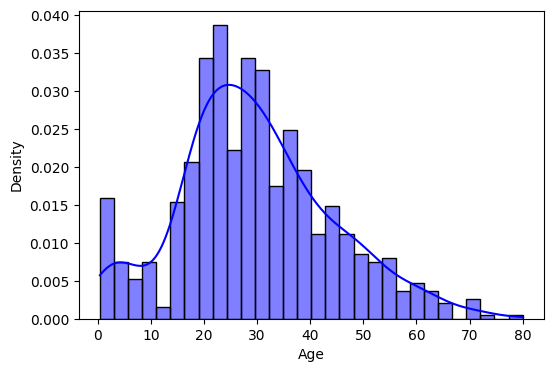

In [ ]:
# Crear un gráfico de distribución
plt.figure(figsize=(6, 4))
sns.histplot(titanic['Age'], bins=30, kde=True, color='blue', stat='density')
plt.show()

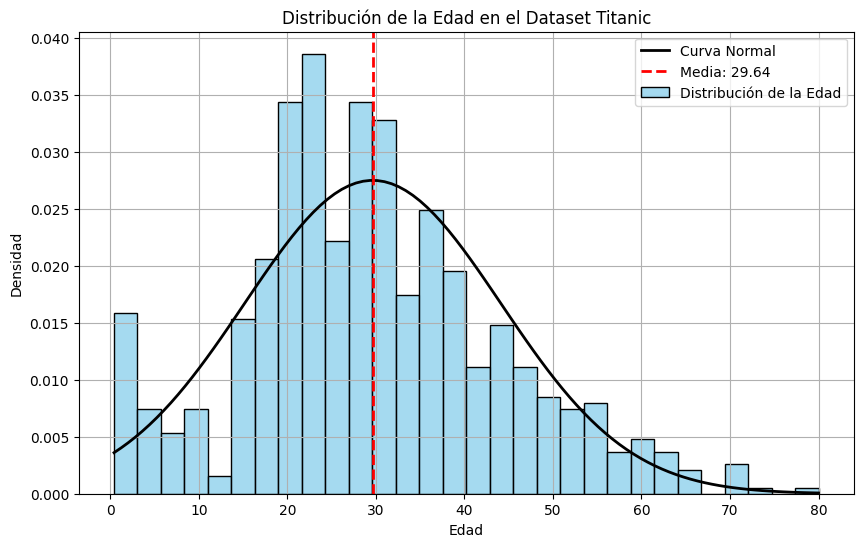

In [ ]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la media y desviación estándar
mean_age = titanic['Age'].mean()
std_age = titanic['Age'].std()

# Crear un rango de valores para la curva normal.
xmin, xmax = titanic["Age"].min(), titanic['Age'].max()
x = np.linspace(xmin, xmax, 100)

# Calcular la curva normal.
p = stats.norm.pdf(x, mean_age, std_age)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=False, stat='density',
             color='skyblue', edgecolor='black', label='Distribución de la Edad')
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2,
            label='Media: {:.2f}'.format(mean_age))
plt.title('Distribución de la Edad en el Dataset Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

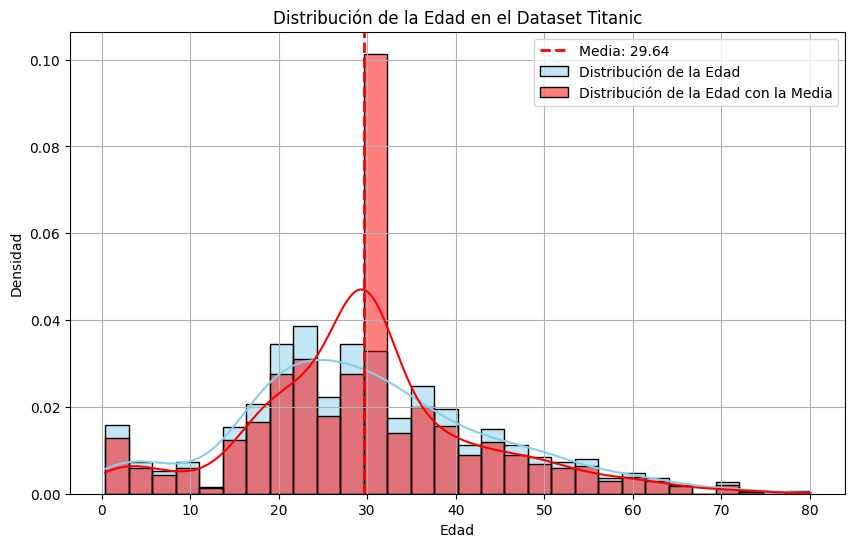

In [ ]:
# Imputación simple por la media.
mean_age = titanic['Age'].mean()  # Calculate the mean of 'Age'
titanic_mean = titanic.fillna({'Age': mean_age})  # Fill NaN in 'Age' with mean_age
#Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, stat='density', color='skyblue', edgecolor='black', label='Distribución de la Edad')
sns.histplot(titanic_mean['Age'], bins=30, kde=True, stat='density', color='r', edgecolor='black', label='Distribución de la Edad con la Media')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Media: {:.2f}'.format(mean_age))
plt.title('Distribución de la Edad en el Dataset Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

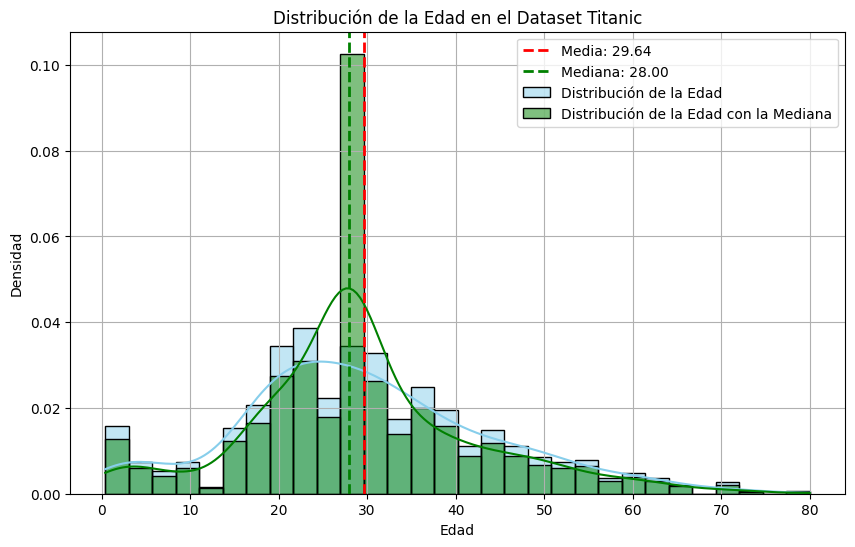

In [ ]:
# Imputación simple por la mediana
mediana_age = titanic['Age'].median()
titanic_mediana = titanic.fillna({'Age': mediana_age})

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, stat='density', color='skyblue', edgecolor="black", label='Distribución de la Edad')
sns.histplot(titanic_mediana['Age'], bins=30, kde=True, stat='density', color='g', edgecolor="black", label="Distribución de la Edad con la Mediana")
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Media: {:.2f}'.format(mean_age))
plt.axvline(mediana_age, color="green", linestyle='dashed', linewidth=2, label="Mediana: {:.2f}".format(mediana_age))
plt.title('Distribución de la Edad en el Dataset Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

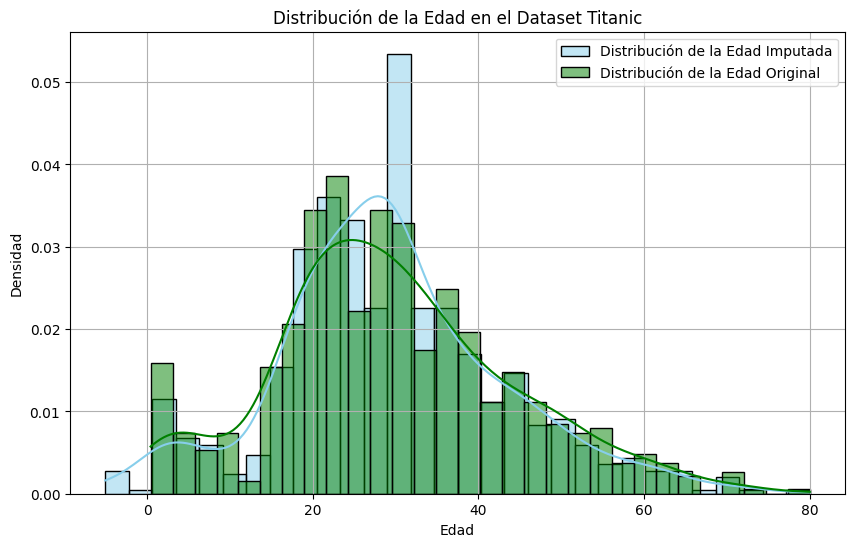

In [ ]:
# Necesario para habilitar IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración del imputador iterativo
imputer = IterativeImputer(random_state=0)  # You can specify a different random_state

# Seleccionamos solo las columnas numéricas para la imputación.
num_data = df.select_dtypes(include=['float', 'int'])
num_data_imputed = imputer.fit_transform(num_data)

# Reemplazamos la columna imputada en el dataframe original
df['Age'] = num_data_imputed[:, num_data.columns.get_loc("Age")]

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, stat='density',
             color='skyblue', edgecolor='black', label='Distribución de la Edad Imputada')
sns.histplot(titanic['Age'], bins=30, kde=True, stat='density',
             color='g', edgecolor="black", label='Distribución de la Edad Original')
plt.title('Distribución de la Edad en el Dataset Titanic')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 1. Calcular el porcentaje de valores faltantes en cada columna
missing_per = titanic.isnull().mean() * 100

# 2. Establecer un umbral, por ejemplo, eliminar columnas con más del 30% de datos faltantes
threshold = 30

# 3. Obtener las columnas que superan el umbral
columns_to_drop = missing_per[missing_per > threshold].index

# 4. Imprimir las columnas que se eliminarán (opcional)
print(columns_to_drop)

# 5. Eliminar las columnas seleccionadas
titanic_cleaned = titanic.drop(columns=columns_to_drop)

# 6. Mostrar el DataFrame resultante
titanic_cleaned.head()

Index(['Cabin'], dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Aplicación y Verificación de Estrategias para Datos Faltantes (Titanic)

Basándonos en el diagnóstico previo (MCAR, MAR, MNAR), seleccionamos y aplicamos las estrategias más adecuadas para cada columna con datos faltantes, verificando luego si introducen sesgos significativos.

## 1. Estrategias Seleccionadas

* **`Embarked` (MCAR, 0.22% faltante):** **Eliminación** de las filas con valores faltantes. Es la opción más simple y directa dado el carácter MCAR y la mínima cantidad de datos.
* **`Age` (MAR, ~20% faltante):** **Imputación con la Mediana por Grupo**. Dado que la falta de edad parece depender de otras variables (MAR), una imputación simple con la mediana global podría no ser óptima. Imputar con la mediana de `Age` calculada *dentro de grupos* más homogéneos (por ejemplo, combinaciones de `Pclass` y `Sex`) suele ser más preciso y preserva mejor las relaciones existentes. Eliminar el 20% de los datos no es aconsejable.
* **`Cabin` (MNAR, ~77% faltante):** **Creación de una Nueva Categoría**. La ausencia de cabina es informativa y probablemente indica una característica del pasajero (clase baja, sin cabina asignada). La mejor estrategia es tratar la ausencia como información, imputando los NaN con una categoría específica como `'Missing'` o `'Unknown'`. Esto convierte la columna en categórica o preserva la información de ausencia. La eliminación es inviable y la imputación numérica/aleatoria no tiene sentido.

## 2. Aplicación de Estrategias (Descripción)

1.  **`Embarked`:** Se identifican las 2 filas donde `Embarked` es NaN y se eliminan del DataFrame. El dataset se reduce de 891 a 889 filas.
2.  **`Age`:**
    * Se calculan las medianas de `Age` para cada combinación de `Pclass` y `Sex` usando los datos *no faltantes*.
    * Se rellenan los valores NaN en `Age` utilizando la mediana correspondiente al grupo (`Pclass`, `Sex`) de cada pasajero.
3.  **`Cabin`:**
    * Se rellenan todos los valores NaN en la columna `Cabin` con la cadena de texto `'Missing'`. La columna ahora no tiene valores nulos y contiene los números de cabina originales y la nueva categoría.

## 3. Verificación de Sesgos Introducidos

Para verificar si estas estrategias introducen sesgos, comparamos estadísticas descriptivas y distribuciones *antes* y *después* de aplicarlas.

**a) Verificación para `Embarked` (Eliminación):**

* **Impacto:** Se eliminan solo 2 filas (0.22% de los datos).
* **Medidas Estadísticas:**
    * Comparar la media, mediana, desviación estándar de variables numéricas (`Age`, `Fare`, `SibSp`, `Parch`) antes y después. Se esperan cambios mínimos o nulos.
    * Comparar las frecuencias (value counts) de variables categóricas (`Pclass`, `Sex`, `Survived`) antes y después. Las proporciones deberían permanecer virtualmente idénticas.
* **Gráficos:** Visualizar las distribuciones (histogramas para numéricas, barras para categóricas) antes y después. No deberían observarse diferencias apreciables.
* **Conclusión Esperada:** Debido a la naturaleza MCAR y la pequeñísima cantidad de datos eliminados, es extremadamente improbable que esta estrategia introduzca algún sesgo medible en el dataset.

**b) Verificación para `Age` (Imputación por Mediana Agrupada):**

* **Impacto:** Se modifican 177 valores (~20% de la columna `Age`).
* **Medidas Estadísticas:**
    * Comparar media, mediana, desviación estándar, mínimo y máximo de `Age` antes y después. La *mediana* general podría cambiar ligeramente, la *media* podría cambiar más notablemente, y la *desviación estándar* probablemente disminuirá (al introducir valores repetidos en el centro de las distribuciones de los grupos).
* **Gráficos:**
    * **Histograma/Density Plot de `Age`:** Comparar la forma de la distribución antes y después. La distribución después de la imputación mostrará picos en los valores de las medianas utilizadas para cada grupo. Es crucial verificar si la forma general (aparte de los picos) se mantiene razonablemente similar o si se distorsiona drásticamente.
    * **Box Plots:** Comparar box plots de `Age` vs. `Survived` y `Age` vs. `Pclass` antes y después. Verificar si las relaciones observadas (ej., diferencia de edad mediana entre supervivientes y no supervivientes, o entre clases) se mantienen o si cambian significativamente debido a la imputación.
* **Conclusión Esperada:** La imputación *siempre* altera la distribución original hasta cierto punto (especialmente reduciendo la varianza y creando picos). El objetivo es que esta alteración sea mínima y no cambie fundamentalmente las relaciones con otras variables clave. La imputación por mediana agrupada busca minimizar este sesgo en comparación con una imputación de mediana simple global, al respetar mejor la estructura de los datos. Se debe evaluar si la distorsión introducida es aceptable para análisis posteriores.

**c) Verificación para `Cabin` (Creación de Categoría 'Missing'):**

* **Impacto:** Se modifican 687 valores (~77% de la columna `Cabin`), cambiando su naturaleza (NaN -> 'Missing').
* **Medidas Estadísticas:**
    * Aquí no comparamos la distribución de `Cabin` antes y después en el mismo sentido, sino que analizamos las características del nuevo grupo `'Missing'`.
    * Calcular estadísticas descriptivas (ej., tasa de supervivencia media, tarifa media, distribución de `Pclass`) para el grupo con `Cabin == 'Missing'` y compararlas con las del grupo con cabinas conocidas.
* **Gráficos:**
    * **Bar Plots:** Visualizar `Survived`, `Pclass`, etc., segmentado por si `Cabin` es `'Missing'` o no. Esto confirmará visualmente las fuertes relaciones ya vistas en el mapa de correlación (ej., baja supervivencia y alta proporción de Pclass 3 en el grupo `Cabin == 'Missing'`).
* **Conclusión Esperada:** Esta estrategia no introduce sesgo en el sentido de distorsionar una distribución existente. Al contrario, *preserva y hace explícita* la información contenida en la ausencia del dato, que sabemos que está fuertemente correlacionada con otras variables (MNAR). El "sesgo" (la diferencia entre los que tienen cabina y los que no) es inherente a los datos y esta estrategia lo mantiene visible para el análisis o modelado posterior.

## Decisión Final

Las estrategias elegidas parecen las más adecuadas para cada caso:

* La **eliminación** para `Embarked` es segura y eficiente.
* La **imputación por mediana agrupada** para `Age` es un compromiso razonable para manejar MAR en una cantidad significativa de datos, aunque requiere verificación cuidadosa de la distorsión introducida.
* La **creación de una categoría 'Missing'** para `Cabin` es la mejor forma de manejar MNAR en una variable con tantos datos faltantes, convirtiendo la ausencia en información útil.

Es fundamental realizar las comparaciones estadísticas y gráficas mencionadas *después* de implementar los cambios para confirmar que los sesgos introducidos son manejables y comprendidos.